# Andes ieee14 vsg -- Flat Run

```
To do: vsg case is not stable
```

**Scope**: import ieee14_vsg and flat run

Tips regarding andes:

1. static Gen is for power flow calculation, including 'PV' and 'Slack' <br>
dynamci Gen is for TDS, indlucing 'GENROW' and 'GENCAL'

2. Do not connect VSG to a GENROW <br>
VSG needs to share power from unit static gen


## Case info
'ieee14_vsg'  ---  a new REGCV2 (vsg-controlled inverter) connect to  BUS14
 
'ieee14_vsg1' ---  a REGCV2  (vsg-controlled inverter) replace GENROW_5 of base case

In [52]:
import andes
import os
import pandas as pd
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.5.post4.dev0+gae11a531
Pandapower version: 2.8.0


In [53]:
# Choose case
dir_path = os.path.abspath('..')
case_path = '/Test_ieee14_vsg/ieee14_vsg.xlsx'
case = dir_path + case_path

ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

In [54]:
# Turn on numba to accelerate TDS
ssa.config.numba
ssa.PFlow.run()

True

In [55]:
ssa.TDS.run()

Suspect initialization issue! Simulation may crash!

    Name     | Var. Value | Eqn. Mismatch
-------------+------------+--------------
 Pe REGCV2 1 | 0.100      | -0.200       
 Id REGCV2 1 | -0.099     | 0.198        


Initialization failed!!
If you are developing a new model, check the initialization with
   andes -v 10 run -r tds --init /Users/buxinshe/Documents/git-repo/andes/bshe/Test_ieee14_vsg/ieee14_vsg.xlsx
Otherwise, check the variables that are initialized out of limits.


  0%|          | 0/100 [00:00<?, ?%/s]

True

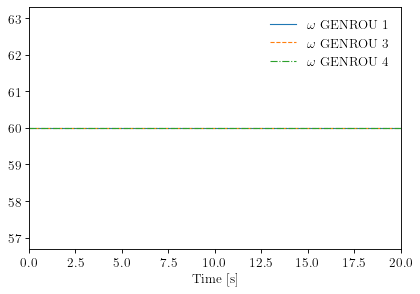

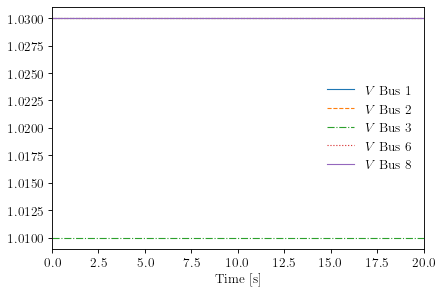

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [56]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3),
                ytimes=60,
               )

ssa.TDS.plt.plot(ssa.GENROU.v)

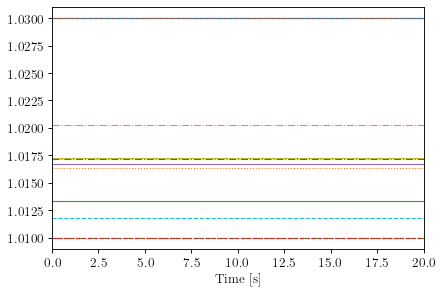

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [57]:
ssa.TDS.plt.plot(ssa.Bus.v)

## Eigenvalue analysis

Singular matrix. Case is not solvable


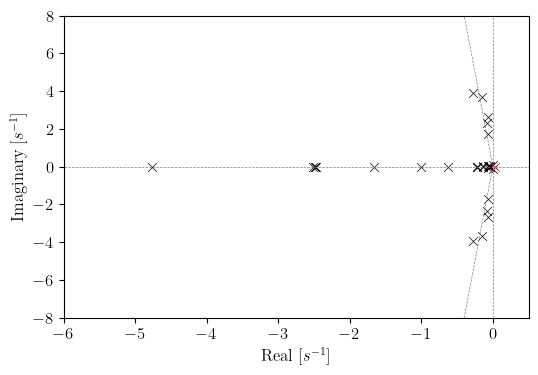

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [58]:
ssa.EIG.run()
ssa.EIG.plot()